In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.naive_bayes import MultinomialNB

# 2.1 Построение модели классификации

In [2]:
df = pd.read_pickle('habr.pickle')
df.head()

,name,rating,date,Vector,nominations,text_lemtize
0,0,None,0,"[-0.14686837386151166, 0.23498939817841866, 0....",0,"[декабрь, состояться, церемония, награждение, ..."
1,1,None,0,"[-0.14686837386151166, 0.23498939817841866, 0....",0,"[декабрь, состояться, церемония, награждение, ..."
2,1,None,1,"[-0.3698977214370539, -0.3698977214370539, -0....",0,"[из, совместный, исследование, издатель, компь..."
3,1,None,1,"[-0.33776026473659926, 0.08444006618414981, -0...",0,"[по, статистика, половина, год, впервые, топ, ..."
4,1,None,2,"[-0.48428058736275703, -0.12107014684068926, -...",0,"[компания, провести, совместный, исследование,..."


In [3]:
txt_train_list = []
txt_train = ''
for i in df['text_lemtize']:
    txt_train = ''
    for j in i:
        txt_train = txt_train + ' ' + j
    txt_train_list.append(txt_train)
df['text_lemtize'] = txt_train_list

In [4]:
df = df.drop(['rating'], axis=1) 
df = df.drop('Vector', axis = 1)
df.head()

,name,date,nominations,text_lemtize
0,0,0,0,декабрь состояться церемония награждение лаур...
1,1,0,0,декабрь состояться церемония награждение лаур...
2,1,1,0,из совместный исследование издатель компьютер...
3,1,1,0,по статистика половина год впервые топ самый ...
4,1,2,0,компания провести совместный исследование евр...


### Разделим выборку на обучающую и тестовую

In [5]:
df['name'] = pd.factorize(df['name'])[0]
X = df['text_lemtize']
y = df['nominations']

На тестовые значения отведём только 1/5 от всего набора. 

В переменную X введём все данные кроме целевой переменной, в y - только целевую переменную.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)

### Обучим нашу модель на классификации Naive Bayes

Наивный байесовский классификатор (Naive Bayes) — это алгоритм машинного обучения, предназначенный для многоклассовой классификации данных с независимыми признаками. За один проход вычисляется условная вероятность каждого признака

In [7]:
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

In [8]:
nb.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [9]:
y_pred = nb.predict(X_test)

### Реализуем метрику. Посмотрим точность модели на классификации Naive Bayes

Accuracy - это метрика, показывающая отношение числа правильно угаданных классов к общему количеству примеров. Данная метрика вполне реализует и показывает нам точность нашей модели, учитывая описанный способ её оценки.

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [11]:
print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.5739644970414202


### Обучим модель на линейной классификации SGDClassifier

Этот оценщик реализует регуляризованные линейные модели со стохастическим градиентным спуском (SGD): градиент потерь оценивается для каждой выборки за раз, и модель обновляется по ходу работы с графиком убывающей прочности (он же скорость обучения).

In [12]:
from sklearn.linear_model import SGDClassifier

In [13]:
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier()),
               ])

In [14]:
sgd.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier())])

### Посмотрим точность модели на классификации SGDClassifier

In [15]:
y_pred = sgd.predict(X_test)

In [16]:
print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.7248520710059172


### Обучим модель на классификации логистической регресии LogisticRegression

Логистическая регрессия - это процесс моделирования вероятности дискретного результата с учетом входной переменной

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1000)),
               ])

In [19]:
logreg.fit(X_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=1000, n_jobs=1))])

### Посмотрим точность модели на классификации LogisticRegression

In [20]:
y_pred = logreg.predict(X_test)

In [21]:
print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.7189349112426036


## Выберем наилучшую модель

Обучив и посмотрел на все модели (их точность по выбранной метрике). Мы сделаем выбор в пользу модели, которая показала наилучшие результаты в выбранной метрике. Наилучшей моделью таким образом оказалась модель, основанная на классификации при помощи SGDClassifier - метрика показала результат в 0.725, что является наивысшим результатом среди всех обученных моделей. Выберем SGDClassifier

# 2.2 Оптимизация модели

### Настроим нашу модель

### Оптимизируем выбранную модель путём настройки гиперпараметров

In [53]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [54]:
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(alpha = 0.001, max_iter = 1500)),
               ])

In [55]:
sgd.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(alpha=0.001, max_iter=1500))])

In [56]:
y_pred = sgd.predict(X_test)

In [57]:
print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.7455621301775148


Как мы можем видеть увеличение значений alpha и max_iter по сравнению со стандартными дали увеличение значений метрики. Было - 0.725, Стало - 0.746

Мы улучшили нашу модель

### Построим кривую обучения

In [64]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Learning curve')

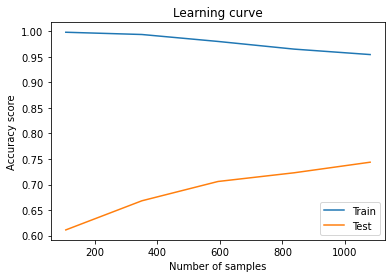

In [61]:
train_sizes, train_scores, test_scores = learning_curve(sgd, X_train, y_train, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Train')
plt.plot(train_sizes, test_scores_mean, label='Test')
plt.legend()
plt.xlabel('Number of samples')
plt.ylabel('Accuracy score')
plt.title('Learning curve')

Мы явно не видим недообучения модели - с достаточным количеством образцов (как мы и указали для обучения) тестовые данные показывают хоть ожидаемо и меньший результат по сравнению с тренировочными данными, но вполне высокий результат по метрике, которую мы уже посмотрели. 

Переобучения так же не происходит - модель на тестовых данных не показывает таких же хороших результатов, как на тренировочном наборе


## Сохраним нашу модель

In [68]:
from joblib import dump, load

In [69]:
dump(sgd, 'filename.joblib') 

['filename.joblib']

Модель сохранена. Её можно будет использовать в дальнейшем

# 2.3 Подготовка отчёта

### 2.1 Построение модели классификации

Для построения лучшей модели мы взяли значимые для обучения данные. Для обучения подошёл наш подготовленный текст в виде строчного формата. Разделили выборку на тестовую и обучающую в неравной пропорции (тренировочным данным выделили больше данных). Далее приступили к обучению модели. Всего мы реализовали три модели: Naive Bayes, SGDClassifier и LogisticRegression. Все модели показали хорошие результаты по выбранной метрике (выбрали простую, базовую, но рабочую метрику accuracy), но лучший результат показала модель основанная на SGDClassifier.

### 2.2 Оптимизация модели

Нашу выбранную модель (обученную на SGDClassifier) мы улучшили путём настройки её гиперпараметров. По метрике мы улучшили её с 0.725 до 0.746. Для дальнейших выводов построили кривую обучения и сделали выводы о недообучении или переобучении модели. Но модель показала хорошие результаты, тестовые данные показали реалистичные результаты не схожие с тренировочными. Недообучения или переобучения модели не замечено. Далее сохранили модель для возможности её дальнейшего использования в формате joblib

## Итог

Получилось успешно применить полученные данные для разбиения данных и обучения моделей на них. Была выбрана наилучшая модель из обученных и улучшена. Итоговая модель хорошо обучена и вполне работоспособна. Итоговая модель сохранена.

Полученные данные, а в частности подготовленный текст подходят для обучения. Модель способна проводить по этим данным оценку.